In [38]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_curve,auc,confusion_matrix
from sklearn.datasets import load_iris

np.set_printoptions(precision=8, suppress=True)
pd.set_option('display.float_format', '{:.8f}'.format)

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

<img src='https://blog.kakaocdn.net/dna/t98JC/btsa6CuL7nS/AAAAAAAAAAAAAAAAAAAAAK32wdgXML8riDq-x9JGCuY2AwTjYVYT8-E5c199JyIX/img.png?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1767193199&allow_ip=&allow_referer=&signature=P4KWnou6%2B84R7J1A8diS%2FbMPXaA%3D'>

In [6]:
iris = load_iris(as_frame=True)
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [7]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
iris['data']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
iris['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [10]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris['frame']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
iris['frame'].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


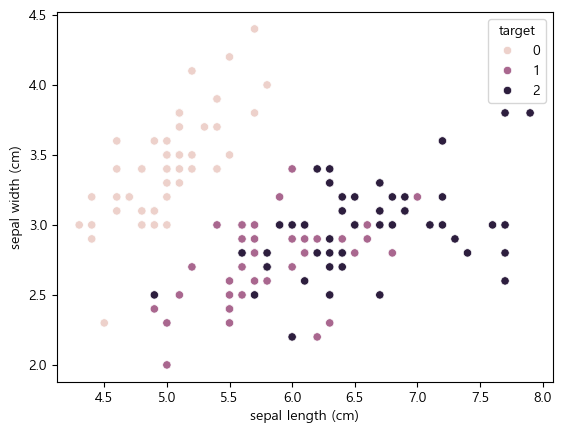

In [13]:
import seaborn as sb
sb.scatterplot(data = iris['frame'], 
        x='sepal length (cm)',y= 'sepal width (cm)', hue='target')
plt.show()

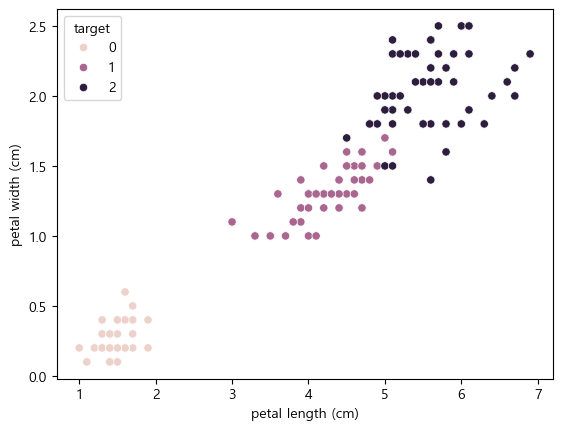

In [14]:
sb.scatterplot(data = iris['frame'], 
        x='petal length (cm)',y= 'petal width (cm)', hue='target')
plt.show()

In [15]:
x_data = iris['data']
y_data = iris['target']

In [16]:
model = LogisticRegression(max_iter=500)
model.fit( x_data,y_data)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [17]:
# w :(특성데이터갯수, 라벨(분류)의갯수) (4,3)
# b: 라벨(분류) 의 갯수 ( 3 )
model.coef_.T

array([[-0.4248362 ,  0.53512448, -0.11028828],
       [ 0.96741615, -0.32086871, -0.64654745],
       [-2.51536487, -0.20703587,  2.72240073],
       [-1.08235714, -0.94315282,  2.02550996]])

In [18]:
model.intercept_

array([  9.85393186,   2.23224793, -12.08617979])

In [28]:
xd = pd.DataFrame({'sepal length (cm)':[5.1],'sepal width (cm)':[3.5],
                    'petal length (cm)':[1.4],'petal width (cm)':[0.2] })
model.predict_proba( xd )

array([[0.98157372, 0.01842627, 0.00000001]])

In [25]:
model.predict_proba(  [[5.1,3.5,1.4,0.2]]	 )

c:\Users\Dell5371\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.9816, 0.0184, 0.    ]])

In [23]:
model.predict(xd)

array([0])

In [32]:
y_data

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [36]:
pred=model.predict(x_data)

In [41]:
print('정확도', accuracy_score(y_data, pred) )
print('정밀도', precision_score(y_data, pred, average='macro') )
print('재현율', recall_score(y_data, pred,average='macro') )
print('f1 score', f1_score(y_data, pred,average='macro') )

confusion_matrix(y_data,pred)

정확도 0.9733333333333334
정밀도 0.9738247863247862
재현율 0.9733333333333333
f1 score 0.9733226623982927


array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])